In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Code to dezip data

In [2]:
#import gzip
#import shutil
#with gzip.open('Expanded_data/mid2name.tsv.gz', 'rb') as f_in:
#     with open('Expanded_data/mid2name.tsv', 'wb') as f_out:
#         shutil.copyfileobj(f_in, f_out)

# Exploratory data analysis

In this notebook we are going to load the data and start to do some preliminary data exploration.

## 1) Character metadata

This dataset contains information about 450'669 characters along with movies, extracted from the November 4, 2012 dump of Freebase

In [3]:
columns_character = ['Wikipedia movie ID', 'Freebase movie ID', 'Movie release date', 'Character name', 'Actor date of birth',
                     'Actor gender', 'Actor height (in meters)', 'Actor ethnicity (Freebase ID)', 'Actor name', 
                     'Actor age at movie release', 'Freebase character/actor map ID', 'Freebase character ID',
                     'Freebase actor ID']

df_character = pd.read_csv("MovieSummaries/character.metadata.tsv",sep='\t',names=columns_character)
df_character.head()

Wikipedia movie ID Freebase movie ID Movie release date  \
0              975900         /m/03vyhn         2001-08-24   
1              975900         /m/03vyhn         2001-08-24   
2              975900         /m/03vyhn         2001-08-24   
3              975900         /m/03vyhn         2001-08-24   
4              975900         /m/03vyhn         2001-08-24   

               Character name Actor date of birth Actor gender  \
0                    Akooshay          1958-08-26            F   
1  Lieutenant Melanie Ballard          1974-08-15            F   
2         Desolation Williams          1969-06-15            M   
3          Sgt Jericho Butler          1967-09-12            M   
4             Bashira Kincaid          1977-09-25            F   

   Actor height (in meters) Actor ethnicity (Freebase ID)          Actor name  \
0                     1.620                           NaN      Wanda De Jesus   
1                     1.780                    /m/044038p  Natasha Henstridge   
2                     1.727                       /m/0x67            Ice Cube   
3                     1.750                           NaN       Jason Statham   
4                     1.650                           NaN         Clea DuVall   

   Actor age at movie release Freebase character/actor map ID  \
0                        42.0                      /m/0bgchxw   
1                        27.0                       /m/0jys3m   
2                        32.0                       /m/0jys3g   
3                        33.0                      /m/02vchl6   
4                        23.0                      /m/02vbb3r   

  Freebase character ID Freebase actor ID  
0            /m/0bgcj3x        /m/03wcfv7  
1            /m/0bgchn4         /m/0346l4  
2            /m/0bgchn_        /m/01vw26l  
3            /m/0bgchnq         /m/034hyc  
4            /m/0bgchp9         /m/01y9xg

### Map freebase ID  

As we are interested in the exploration of the ethnicities, we need to map the freebase ID of the ethnicities to something more meaningful for a human

In [4]:
# Load the data to map the Freebase ID to a title
# Unzip the mid2name.tsv.gz file before running this cell
df_mapID = pd.read_csv("Expanded_data/mid2name.tsv", sep='\t', names=['ID', 'title'])
df_mapID.head()

ID      title
0  /m/0gw0  Anarchism
1  /m/0gwj     Autism
2  /m/0gx0     Albedo
3  /m/0gxj  Abu Dhabi
4  /m/0gy0          A

In [5]:
print(df_mapID.shape)
print(df_mapID.dtypes)

(7606464, 2)
ID       object
title    object
dtype: object


In [6]:
# Example of a mapping of one ethnicity
df_mapID.loc[df_mapID.ID == '/m/0x67'].head(5)

ID                          title
813      /m/0x67               African American
3314645  /m/0x67                African Amerian
3314646  /m/0x67                 Black-American
3314647  /m/0x67                         Brotha
3314648  /m/0x67  Light-skinned AfricanAmerican

In [7]:
# As there is many titles to one ID, we choose to drop duplicate by keeping only the first row in which the ID appears
print(df_mapID.ID.is_unique)
df_mapID = df_mapID.drop_duplicates(subset=["ID"], keep='first')
print(df_mapID.shape)

False
(3305955, 2)


In [8]:
# Merging the ethnicity ID with the mapID data
ethnicity = df_character['Actor ethnicity (Freebase ID)']
df_ethnicity = ethnicity.to_frame()
df_ethnicity.columns = ['ID']
df_ethnicity.head()
df_merge = pd.merge(df_ethnicity, df_mapID, how='left')
df_merge.head()

ID             title
0         NaN               NaN
1  /m/044038p               NaN
2     /m/0x67  African American
3         NaN               NaN
4         NaN               NaN

In [9]:
# Add the ethnicity titles to the character metadata
df_character['Ethnicity'] = df_merge['title']
df_character.head()

Wikipedia movie ID Freebase movie ID Movie release date  \
0              975900         /m/03vyhn         2001-08-24   
1              975900         /m/03vyhn         2001-08-24   
2              975900         /m/03vyhn         2001-08-24   
3              975900         /m/03vyhn         2001-08-24   
4              975900         /m/03vyhn         2001-08-24   

               Character name Actor date of birth Actor gender  \
0                    Akooshay          1958-08-26            F   
1  Lieutenant Melanie Ballard          1974-08-15            F   
2         Desolation Williams          1969-06-15            M   
3          Sgt Jericho Butler          1967-09-12            M   
4             Bashira Kincaid          1977-09-25            F   

   Actor height (in meters) Actor ethnicity (Freebase ID)          Actor name  \
0                     1.620                           NaN      Wanda De Jesus   
1                     1.780                    /m/044038p  Natasha Henstridge   
2                     1.727                       /m/0x67            Ice Cube   
3                     1.750                           NaN       Jason Statham   
4                     1.650                           NaN         Clea DuVall   

   Actor age at movie release Freebase character/actor map ID  \
0                        42.0                      /m/0bgchxw   
1                        27.0                       /m/0jys3m   
2                        32.0                       /m/0jys3g   
3                        33.0                      /m/02vchl6   
4                        23.0                      /m/02vbb3r   

  Freebase character ID Freebase actor ID         Ethnicity  
0            /m/0bgcj3x        /m/03wcfv7               NaN  
1            /m/0bgchn4         /m/0346l4               NaN  
2            /m/0bgchn_        /m/01vw26l  African American  
3            /m/0bgchnq         /m/034hyc               NaN  
4            /m/0bgchp9         /m/01y9xg               NaN

### Control the NaN

In [10]:
print('Sum of NaN in each feature : ')
df_character.isna().sum(axis = 0)

Sum of NaN in each feature : 


Wikipedia movie ID                      0
Freebase movie ID                       0
Movie release date                   9995
Character name                     257875
Actor date of birth                106145
Actor gender                        45609
Actor height (in meters)           295845
Actor ethnicity (Freebase ID)      344611
Actor name                           1228
Actor age at movie release         158113
Freebase character/actor map ID         0
Freebase character ID              257865
Freebase actor ID                     815
Ethnicity                          347872
dtype: int64

In [11]:
print('Percentage of NaN in each feature : ')
df_character.isna().sum(axis = 0) / df_character.shape[0] * 100

Percentage of NaN in each feature : 


Wikipedia movie ID                  0.000000
Freebase movie ID                   0.000000
Movie release date                  2.217814
Character name                     57.220488
Actor date of birth                23.552763
Actor gender                       10.120288
Actor height (in meters)           65.645740
Actor ethnicity (Freebase ID)      76.466542
Actor name                          0.272484
Actor age at movie release         35.084064
Freebase character/actor map ID     0.000000
Freebase character ID              57.218269
Freebase actor ID                   0.180842
Ethnicity                          77.190133
dtype: float64

### Ethnicity

If we focus on the ethnicity, we see that the dataset contains 344'611 NaN values over 450'669!

344611
(53,)


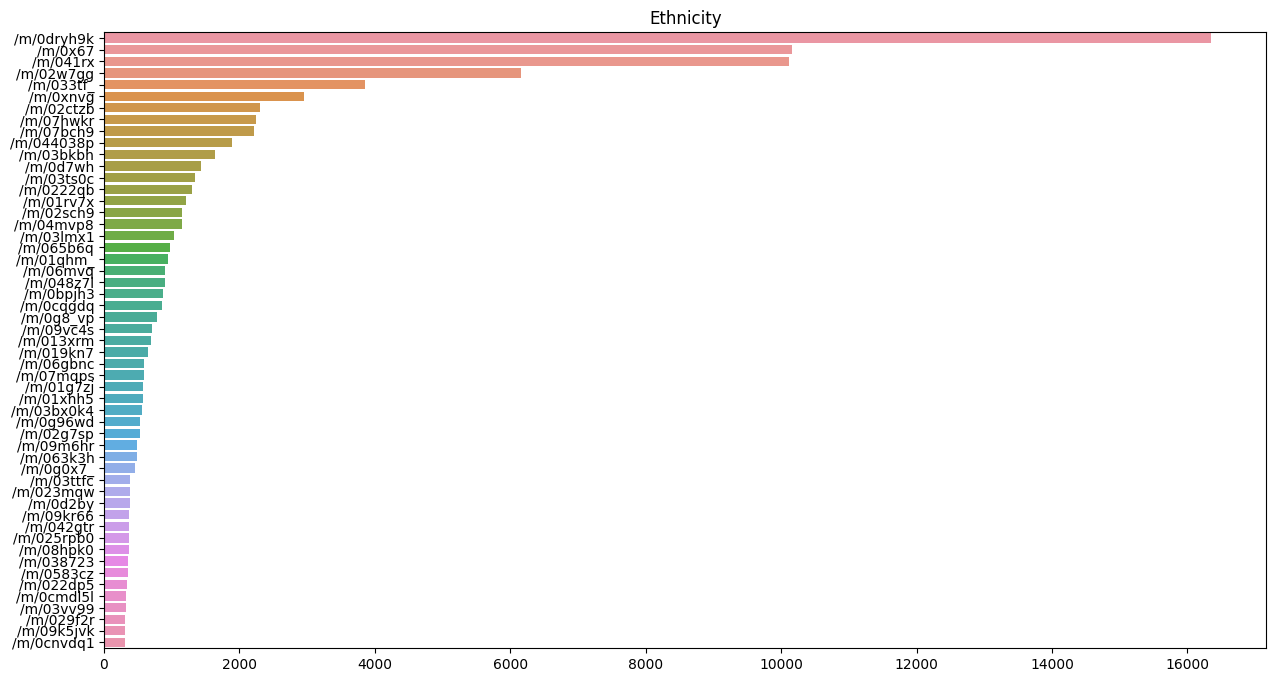

In [ ]:
print(sum(df_character['Actor ethnicity (Freebase ID)'].isna()))
df_ethnicity = df_character['Actor ethnicity (Freebase ID)'].dropna()
relevant_race = df_ethnicity.value_counts()
relevant_race = relevant_race[relevant_race > 300]
print(relevant_race.shape)

plt.figure(figsize=(15,8))
ax = sns.barplot(x=relevant_race.values, y=relevant_race.index).set(title='Ethnicity')
plt.show()

347872
(51,)


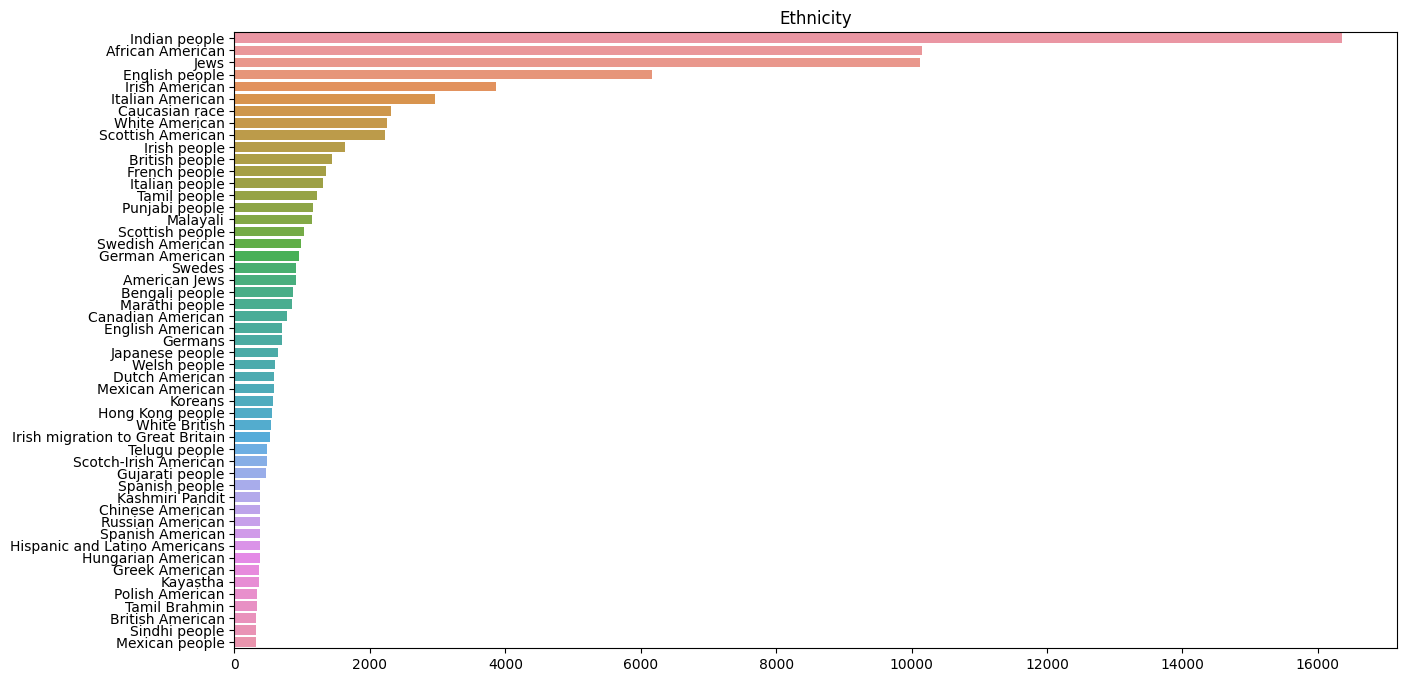

In [ ]:
# With the ethnicity column
print(sum(df_character['Ethnicity'].isna()))
df_ethnicity = df_character['Ethnicity'].dropna()
relevant_race = df_ethnicity.value_counts()
relevant_race = relevant_race[relevant_race > 300]
print(relevant_race.shape)

plt.figure(figsize=(15,8))
ax = sns.barplot(x=relevant_race.values, y=relevant_race.index).set(title='Ethnicity')
plt.show()

## 2) Movie metadata

This dataset contains information about 81'741 movies, extracted from the Noverber 4, 2012 dump of Freebase.

In [219]:
df_movie = pd.read_csv("Expanded_data/movie.expanded_metadata.tsv",sep='\t')
print(df_movie.shape)
df_movie.head(3)

(81741, 9)


Wikipedia movie ID Freebase movie ID         Movie name Movie release date  \
0            142780.0         /m/011_mj         The Circus         1928-01-06   
1            142786.0         /m/011_p6        Thunderbolt               1929   
2            142822.0         /m/011_zy  The Green Goddess         1930-02-13   

   Movie box office revenue  Movie runtime  \
0                       NaN           68.0   
1                       NaN           91.0   
2                       NaN           73.0   

           Movie languages (Freebase ID:name tuples)  \
0  {"/m/06ppq": "Silent film", "/m/02h40lc": "Eng...   
1                 {"/m/02h40lc": "English Language"}   
2                 {"/m/02h40lc": "English Language"}   

   Movie countries (Freebase ID:name tuples)  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2  {"/m/09c7w0": "United States of America"}   

              Movie genres (Freebase ID:name tuples)  
0  {"/m/06cvj": "Romantic comedy", "/m/06ppq": "S...  
1  {"/m/07s9rl0": "Drama", "/m/01g6gs": "Black-an...  
2  {"/m/02rd8h3": "Goat gland", "/m/07s9rl0": "Dr...

### Extract columns of languages, countries and genres names

In [220]:
def transform_into_dict(text) :
    ''' Transform the Freebase ID:name tuples strings into a dictionary for the genres abd countries '''
    if text != '{}' :
        text = text.replace('"','')[1:-1]
        return dict(subString.split(": ") for subString in text.split(", "))
    else :
        return float('NaN')
    
def transform_into_dict_2(text) :
    ''' Transform the Freebase ID:name tuples strings into a dictionary for the languages. This is a specific function for this feature only because
    there are , inside values of the dictionnary (Example : 'Thai, Northeastern Language' at index 1754) '''
    if text != '{}' :
        text = text[2:-2]
        text = text.replace(', "', '')
        text = text.replace(': ', '')
        return dict(subString.split('""') for subString in text.split('"/'))
    else :
        return float('NaN')

# Change the (Freebase ID:name tuples) columns from strings to dictionnaries     
df_movie['Movie genres (Freebase ID:name tuples)'] = df_movie['Movie genres (Freebase ID:name tuples)'].apply(lambda x: transform_into_dict(x))
df_movie['Movie countries (Freebase ID:name tuples)'] = df_movie['Movie countries (Freebase ID:name tuples)'].apply(lambda x: transform_into_dict(x))
df_movie['Movie languages (Freebase ID:name tuples)'] = df_movie['Movie languages (Freebase ID:name tuples)'].apply(lambda x: transform_into_dict_2(x))


def transform_to_list_names(d) :
    ''' Transform a dict into a list of its values '''
    if isinstance(d, dict):
        return list(d.values())
    else :
        return d
    
    
# New column with the list of names only --> easier to do analyses 
df_movie['Movie languages names'] = df_movie['Movie languages (Freebase ID:name tuples)'].apply(lambda x: transform_to_list_names(x))
df_movie['Movie countries names'] = df_movie['Movie countries (Freebase ID:name tuples)'].apply(lambda x: transform_to_list_names(x))
df_movie['Movie genres names'] = df_movie['Movie genres (Freebase ID:name tuples)'].apply(lambda x: transform_to_list_names(x))

In [221]:
df_movie.head(3)

Wikipedia movie ID Freebase movie ID         Movie name Movie release date  \
0            142780.0         /m/011_mj         The Circus         1928-01-06   
1            142786.0         /m/011_p6        Thunderbolt               1929   
2            142822.0         /m/011_zy  The Green Goddess         1930-02-13   

   Movie box office revenue  Movie runtime  \
0                       NaN           68.0   
1                       NaN           91.0   
2                       NaN           73.0   

           Movie languages (Freebase ID:name tuples)  \
0  {'/m/06ppq': 'Silent film', 'm/02h40lc': 'Engl...   
1                 {'/m/02h40lc': 'English Language'}   
2                 {'/m/02h40lc': 'English Language'}   

   Movie countries (Freebase ID:name tuples)  \
0  {'/m/09c7w0': 'United States of America'}   
1  {'/m/09c7w0': 'United States of America'}   
2  {'/m/09c7w0': 'United States of America'}   

              Movie genres (Freebase ID:name tuples)  \
0  {'/m/06cvj': 'Romantic comedy', '/m/06ppq': 'S...   
1  {'/m/07s9rl0': 'Drama', '/m/01g6gs': 'Black-an...   
2  {'/m/02rd8h3': 'Goat gland', '/m/07s9rl0': 'Dr...   

             Movie languages names       Movie countries names  \
0  [Silent film, English Language]  [United States of America]   
1               [English Language]  [United States of America]   
2               [English Language]  [United States of America]   

                                  Movie genres names  
0  [Romantic comedy, Silent film, Adventure, Blac...  
1                           [Drama, Black-and-white]  
2        [Goat gland, Drama, Indie, Black-and-white]

### Merge the plot summaries data

In [13]:
# Load the data
df_summaries = pd.read_csv("MovieSummaries/plot_summaries.txt",sep='\t', names=['Wikipedia movie ID', 'Plot summary'])
df_summaries.head(3)

Wikipedia movie ID                                       Plot summary
0            23890098  Shlykov, a hard-working taxi driver and Lyosha...
1            31186339  The nation of Panem consists of a wealthy Capi...
2            20663735  Poovalli Induchoodan  is sentenced for six yea...

In [14]:
# Merge with the df_movie thanks to the wikipedia movue ID
df_movie = pd.merge(df_movie, df_summaries, how='left')
df_movie.head(3)

Wikipedia movie ID Freebase movie ID         Movie name Movie release date  \
0            142780.0         /m/011_mj         The Circus         1928-01-06   
1            142786.0         /m/011_p6        Thunderbolt               1929   
2            142822.0         /m/011_zy  The Green Goddess         1930-02-13   

   Movie box office revenue  Movie runtime  \
0                       NaN           68.0   
1                       NaN           91.0   
2                       NaN           73.0   

           Movie languages (Freebase ID:name tuples)  \
0  {"/m/06ppq": "Silent film", "/m/02h40lc": "Eng...   
1                 {"/m/02h40lc": "English Language"}   
2                 {"/m/02h40lc": "English Language"}   

   Movie countries (Freebase ID:name tuples)  \
0  {"/m/09c7w0": "United States of America"}   
1  {"/m/09c7w0": "United States of America"}   
2  {"/m/09c7w0": "United States of America"}   

              Movie genres (Freebase ID:name tuples)  \
0  {"/m/06cvj": "Romantic comedy", "/m/06ppq": "S...   
1  {"/m/07s9rl0": "Drama", "/m/01g6gs": "Black-an...   
2  {"/m/02rd8h3": "Goat gland", "/m/07s9rl0": "Dr...   

                                        Plot summary  
0  At a circus midway, the penniless and hungry T...  
1                                                NaN  
2  A small plane carrying three British citizens ...

### Control NaN

In [222]:
print('Sum of NaN in each feature : ')
print(df_movie.isna().sum(axis = 0))

print('\nSum of {} in the string columns : ')
print('Movie languages : {}'.format(sum(df_movie['Movie languages (Freebase ID:name tuples)']=='{}')))
print('Movie countries : {}'.format(sum(df_movie['Movie countries (Freebase ID:name tuples)']=='{}')))
print('Movie genres : {}'.format(sum(df_movie['Movie genres (Freebase ID:name tuples)']=='{}')))

Sum of NaN in each feature : 
Wikipedia movie ID                               0
Freebase movie ID                                0
Movie name                                       0
Movie release date                            3238
Movie box office revenue                     72794
Movie runtime                                20450
Movie languages (Freebase ID:name tuples)    13866
Movie countries (Freebase ID:name tuples)     8154
Movie genres (Freebase ID:name tuples)        2294
Movie languages names                        13866
Movie countries names                         8154
Movie genres names                            2294
dtype: int64

Sum of {} in the string columns : 
Movie languages : 0
Movie countries : 0
Movie genres : 0


In [225]:
print('Percentage of NaN in each feature : ')
print(df_movie.isna().sum(axis = 0) / df_movie.shape[0] * 100)

print('\nSum of {} in the string columns : ')
print('Movie languages : {}'.format(sum(df_movie['Movie languages (Freebase ID:name tuples)']=='{}')/ df_movie.shape[0] * 100))
print('Movie countries : {}'.format(sum(df_movie['Movie countries (Freebase ID:name tuples)']=='{}')/ df_movie.shape[0] * 100))
print('Movie genres : {}'.format(sum(df_movie['Movie genres (Freebase ID:name tuples)']=='{}')/ df_movie.shape[0] * 100))

Percentage of NaN in each feature : 
Wikipedia movie ID                            0.000000
Freebase movie ID                             0.000000
Movie name                                    0.000000
Movie release date                            3.961292
Movie box office revenue                     89.054452
Movie runtime                                25.018045
Movie languages (Freebase ID:name tuples)    16.963335
Movie countries (Freebase ID:name tuples)     9.975410
Movie genres (Freebase ID:name tuples)        2.806425
Movie languages names                        16.963335
Movie countries names                         9.975410
Movie genres names                            2.806425
dtype: float64

Sum of {} in the string columns : 
Movie languages : 0.0
Movie countries : 0.0
Movie genres : 0.0


### Countries

In [230]:
print(sum(df_movie['Movie countries (Freebase ID:name tuples)'].isna()))
print(sum(df_movie['Movie countries (Freebase ID:name tuples)']=='{}'))
#print(df_movie.shape)


df_countries = df_movie[df_movie['Movie countries (Freebase ID:name tuples)']!='NaN']
#print(df_countries.shape)

df_countries = df_countries['Movie countries (Freebase ID:name tuples)'].value_counts()
relevant_country = df_countries[df_countries > 300]
#print(count.shape)

plt.figure(figsize=(15,8))
ax = sns.barplot(x=relevant_country.values, y=relevant_country.index).set(title='countries')
plt.show()

8154
0


TypeError: unhashable type: 'dict'

<Figure size 1500x800 with 0 Axes>

### Movies across years

3238
False


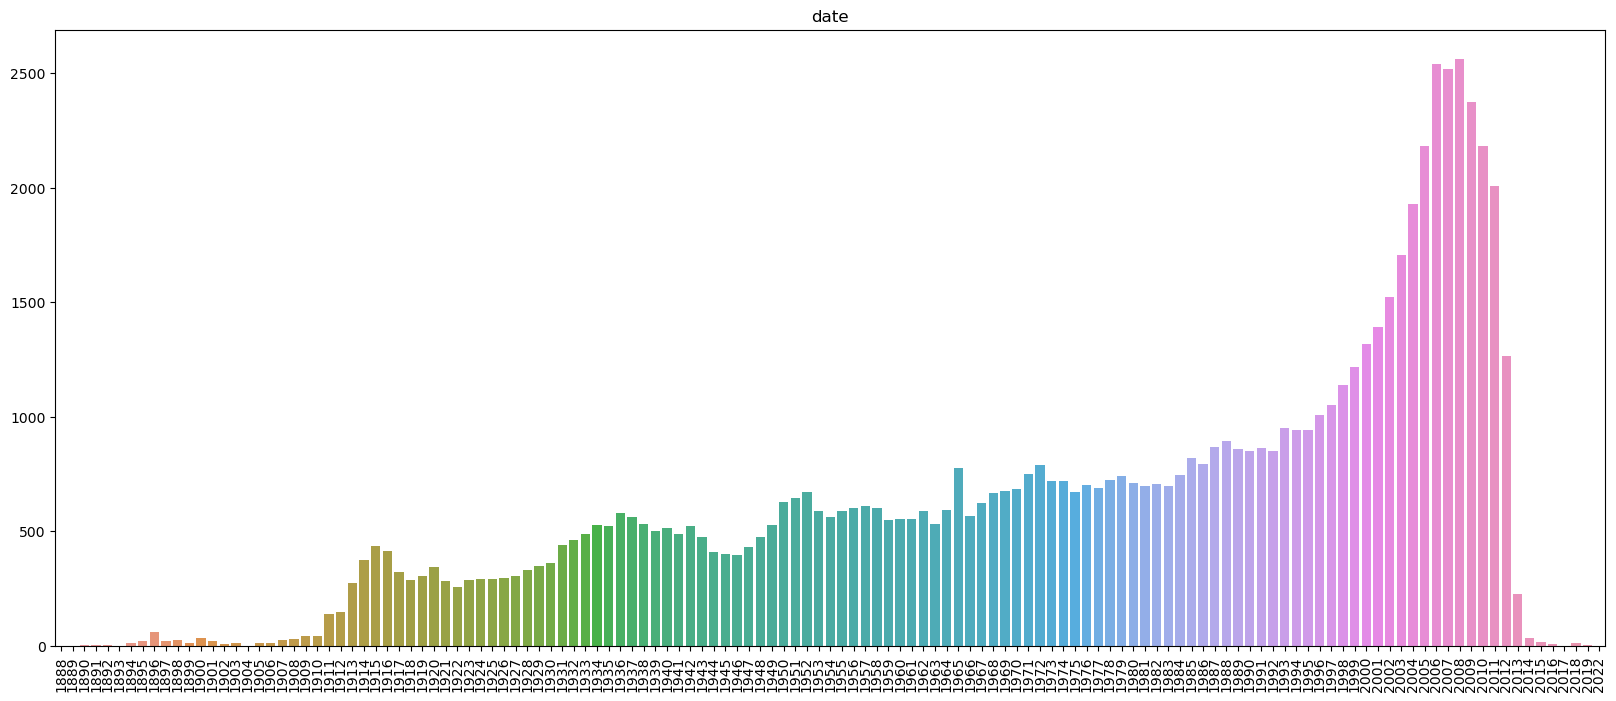

In [228]:
print(sum(df_movie['Movie release date'].isna()))
df_date = df_movie['Movie release date'].dropna()
print(df_date.isna().any())

df_date = pd.to_datetime(df_date, errors='coerce') # ajoute 01-01 pour ceux sans jour et mois
count_per_year = df_date.dt.year.astype('Int64').value_counts()
plt.figure(figsize=(20,8))
ax = sns.barplot(x=count_per_year.index, y=count_per_year.values).set(title='date')
plt.xticks(rotation='vertical')
plt.show()

### Genres

0
2295


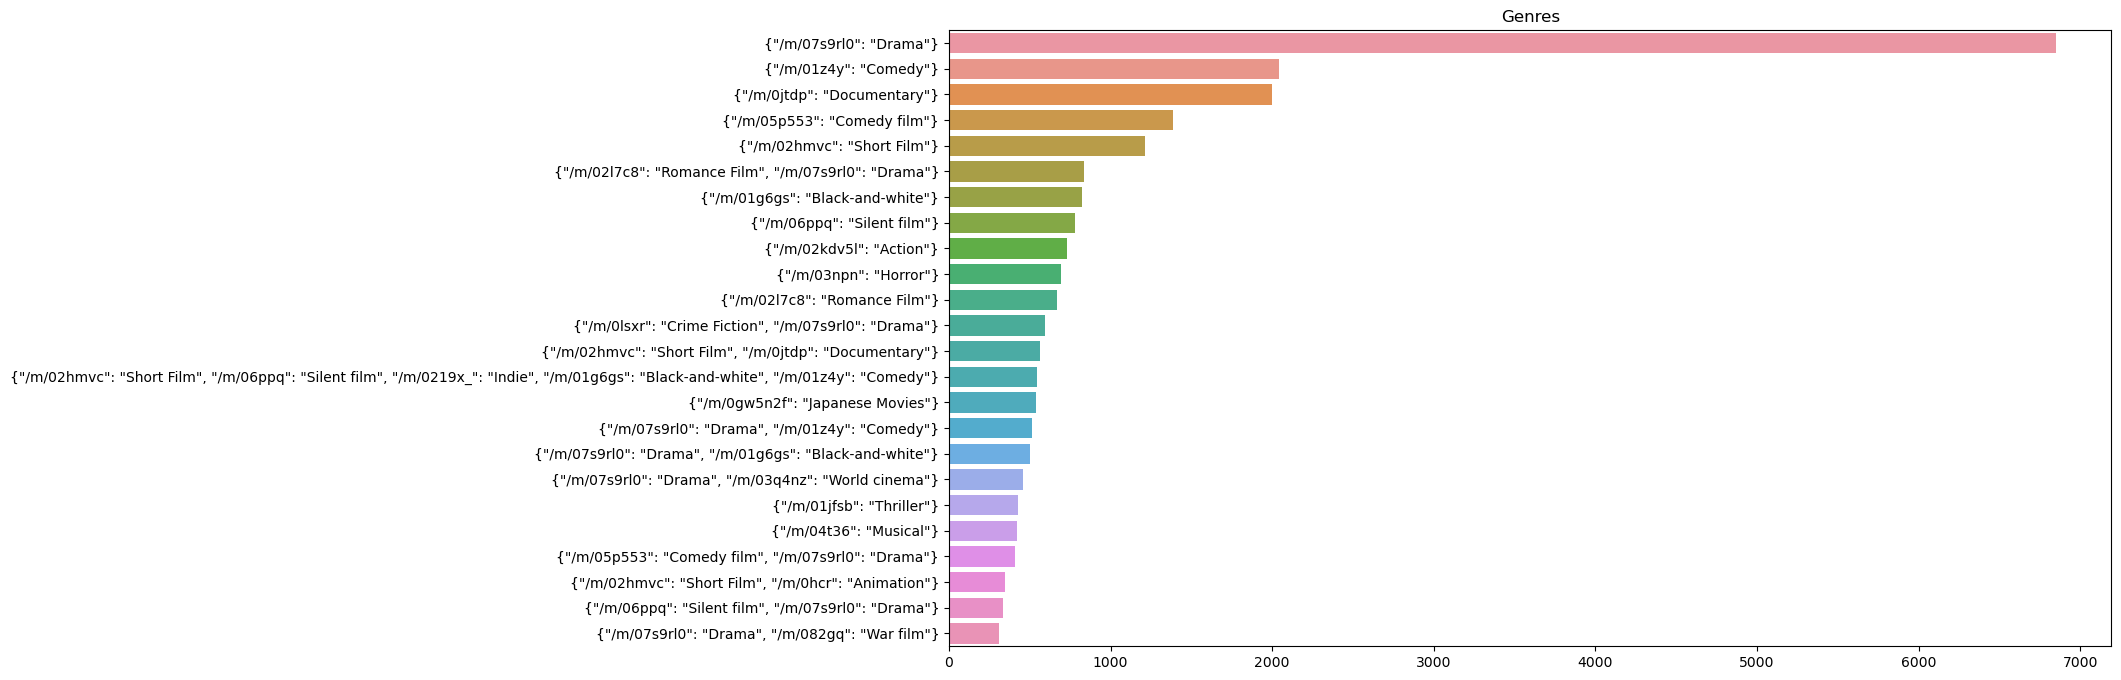

In [19]:
print(sum(df_movie['Movie genres (Freebase ID:name tuples)'].isna()))
print(sum(df_movie['Movie genres (Freebase ID:name tuples)']=='{}'))
#print(df_movie.shape)


df_genres = df_movie[df_movie['Movie genres (Freebase ID:name tuples)']!='{}']
#print(df_countries.shape)

df_genres = df_genres['Movie genres (Freebase ID:name tuples)'].value_counts()
relevant_genres = df_genres[df_genres > 300]
#print(count.shape)

plt.figure(figsize=(15,8))
ax = sns.barplot(x=relevant_genres.values, y=relevant_genres.index).set(title='Genres')
plt.show()

In [22]:
def extract_genre(strings):
    copy = strings.copy()
    drop = []
    # splitted = pd.DataFrame(columns=['genre', 'index'])
    for i,string in enumerate(copy.index):
        split = string.split(",")
        total = len(split)
        if total > 1:
            for numb, s in enumerate(split):
                if numb==0:
                    idx =  s + '}'
                else:
                    if numb==(total-1):
                        idx = '{' + s[1:]
                    else:
                        idx = '{' + s[1:] + '}'

            exist = (copy.index == idx).any()
            
            if exist:
                copy[idx] = copy[idx] + copy[string]
            else:
                copy[idx] = copy[i]
            
            drop.append(string)
            
    copy = copy.drop(drop)
    
    return copy

#fonctionne pas pour tous. 

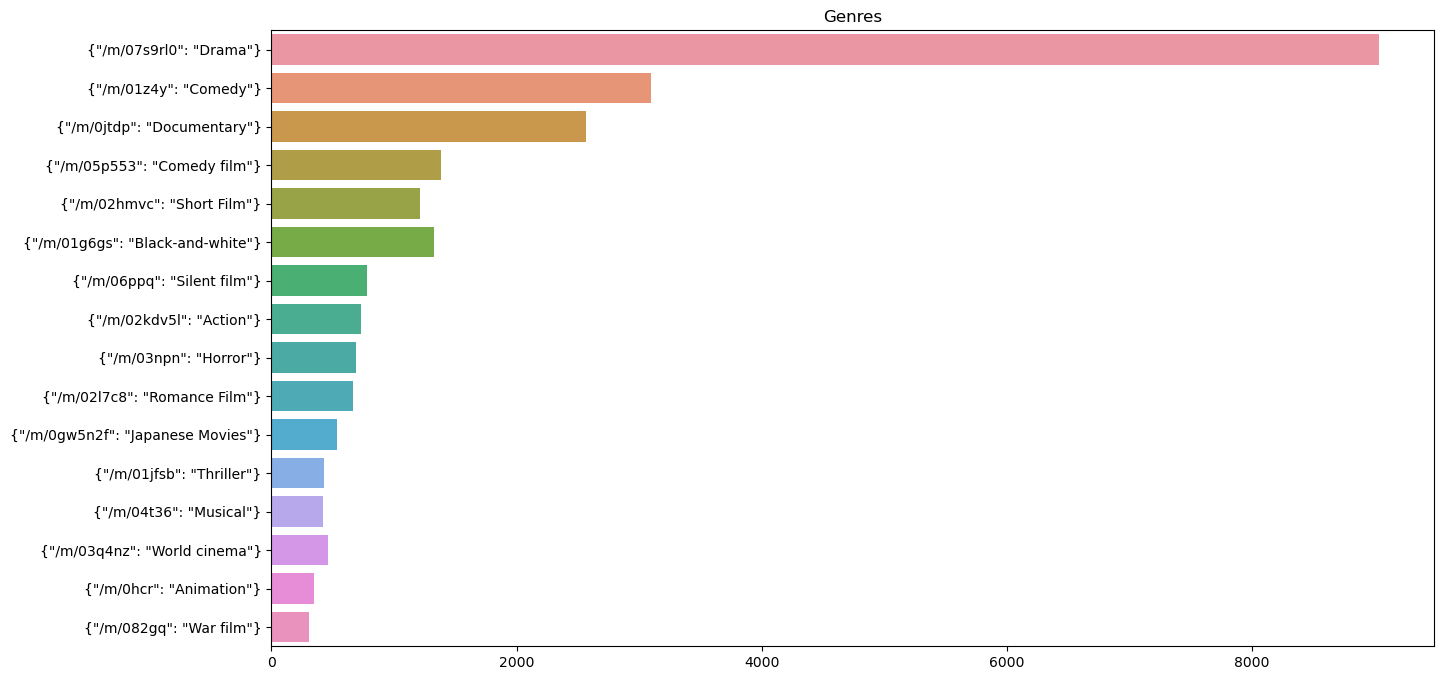

In [21]:
split = extract_genre(relevant_genres)
plt.figure(figsize=(15,8))
ax = sns.barplot(x=split.values, y=split.index).set(title='Genres')
plt.show()

### Genre per year:

In [452]:
remove_nan = df_movie[df_movie['Movie genres (Freebase ID:name tuples)']!='{}']
remove_nan = remove_nan.dropna(subset=['Movie release date'])
remove_nan['Movie release date'] = pd.to_datetime(remove_nan['Movie release date'], errors = 'coerce').dt.year.astype('Int64')




<AxesSubplot: xlabel='Movie release date'>

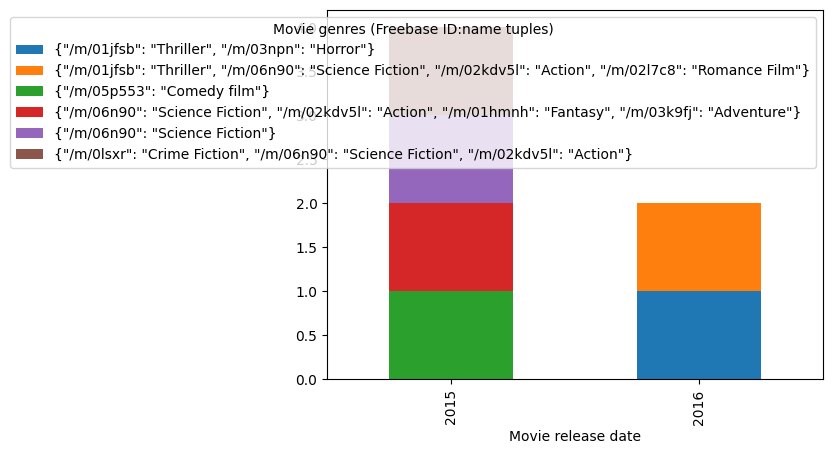

In [456]:
remove_nan = remove_nan[remove_nan['Movie release date']>2014]

len(remove_nan)
remove_nan.groupby(['Movie release date', 'Movie genres (Freebase ID:name tuples)']).size().unstack().plot(kind='bar', stacked=True)
# il faut vraiment séparer les genres, sinon trop de catégories

In [457]:
#Pas terminé... le code extractgenre d'avant ne fonctionne pas tout à fait 
copy_genres = df_movie
copy_genres = copy_genres[copy_genres['Movie genres (Freebase ID:name tuples)']!='{}']
copy_genres = copy_genres.dropna(subset=['Movie release date'])
copy_genres['Movie release date'] = pd.to_datetime(copy_genres['Movie release date'], errors = 'coerce').dt.year.astype('Int64')

copy_genres = copy_genres[['Movie release date','Movie genres (Freebase ID:name tuples)']]
copy_genres = copy_genres[copy_genres['Movie release date']>2013]
for i in range(len(copy_genres)):
    list_tmp = copy_genres['Movie genres (Freebase ID:name tuples)'].values[i].split(',')
    copy_genres['Movie genres (Freebase ID:name tuples)'].values[i] = list_tmp [0]
    n = 2 
    while(n<=len(list_tmp)):
        copy_genres.append(copy_genres.iloc[[i]])
        copy_genres['Movie genres (Freebase ID:name tuples)'].values[-1] = list_tmp [n-1]
        n+=1
copy_genres


C:\Users\rache\AppData\Local\Temp\ipykernel_16888\632313937.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  copy_genres.append(copy_genres.iloc[[i]])
C:\Users\rache\AppData\Local\Temp\ipykernel_16888\632313937.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  copy_genres.append(copy_genres.iloc[[i]])
C:\Users\rache\AppData\Local\Temp\ipykernel_16888\632313937.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  copy_genres.append(copy_genres.iloc[[i]])
C:\Users\rache\AppData\Local\Temp\ipykernel_16888\632313937.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  copy_genres.append(copy_genres.iloc[[i]])
C:\Users\rache\AppData\L

Movie release date Movie genres (Freebase ID:name tuples)
2827                 2014           {"/m/02l7c8": "Romance Film"
8454                 2015        {"/m/06n90": "Science Fiction"}
8674                 2014     {"/m/01zhp": "Computer Animation"}
15032                2014                 {"/m/01z4y": "Comedy"}
34642                2016               {"/m/01jfsb": "Thriller"
35080                2014          {"/m/02l7c8": "Romance Film"}
35534                2014                 {"/m/07s9rl0": "Drama"
35535                2014                 {"/m/07s9rl0": "Drama"
37187                2014                {"/m/02kdv5l": "Action"
40886                2015           {"/m/0lsxr": "Crime Fiction"
50347                2014             {"/m/0hqxf": "Family Film"
52362                2015         {"/m/06n90": "Science Fiction"
53458                2014                {"/m/07s9rl0": "Drama"}
54835                2015           {"/m/05p553": "Comedy film"}
56000                2014               {"/m/01hmnh": "Fantasy"}
58865                2014     {"/m/03bxz7": "Biographical film"}
59279                2014             {"/m/03k9fj": "Adventure"}
66041                2016               {"/m/01jfsb": "Thriller"
71696                2014          {"/m/02l7c8": "Romance Film"}
72152                2014             {"/m/03k9fj": "Adventure"}
72260                2014        {"/m/06n90": "Science Fiction"}
72261                2014        {"/m/06n90": "Science Fiction"}
78039                2014        {"/m/0cq22z7": "Sci-Fi Horror"}
81148                2014           "/m/02l7c8": "Romance Film"}

### Thriller across years:

In [93]:
df_datanan = df_movie.copy()
df_datanan = df_datanan.dropna(subset=['Movie release date'])
df_datanan['Movie release date'] = pd.to_datetime(df_datanan['Movie release date'], errors = 'coerce').dt.year.astype('Int64')

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


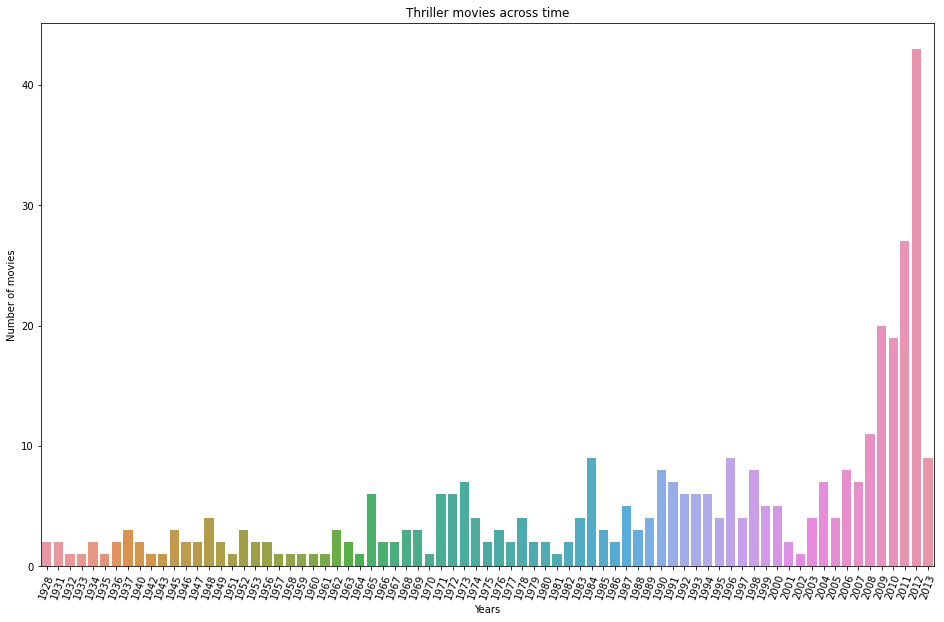

In [94]:
year_counts = df_datanan.loc[df_datanan['Movie genres (Freebase ID:name tuples)'] == '{"/m/01jfsb": "Thriller"}']['Movie release date'].value_counts()

plt.figure(figsize=(16,10))
ax = sns.barplot(year_counts.index,year_counts.values)
plt.title('Thriller movies across time')
plt.ylabel('Number of movies')
plt.xlabel('Years')
plt.xticks(rotation=70)
plt.show()

In [95]:
def is_x(x,string):
    if string in x:
        return 'yes'
    return 'no'

In [96]:
df_datanan['Thriller'] = df_datanan['Movie genres (Freebase ID:name tuples)'].apply(lambda x: is_x(x,'Thriller'))

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


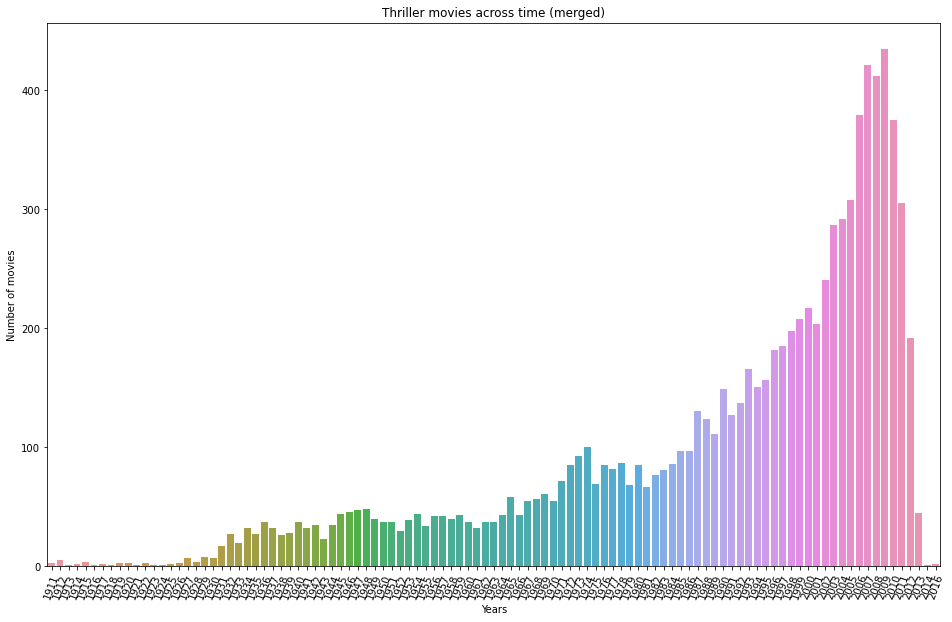

In [102]:
year_counts = df_datanan.loc[df_datanan['Thriller']=='yes']['Movie release date'].value_counts()
year_counts
plt.figure(figsize=(16,10))
ax = sns.barplot(year_counts.index,year_counts.values)
plt.title('Thriller movies across time (merged)')
plt.ylabel('Number of movies')
plt.xlabel('Years')
plt.xticks(rotation=70)
plt.show()

### Drama across years:

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


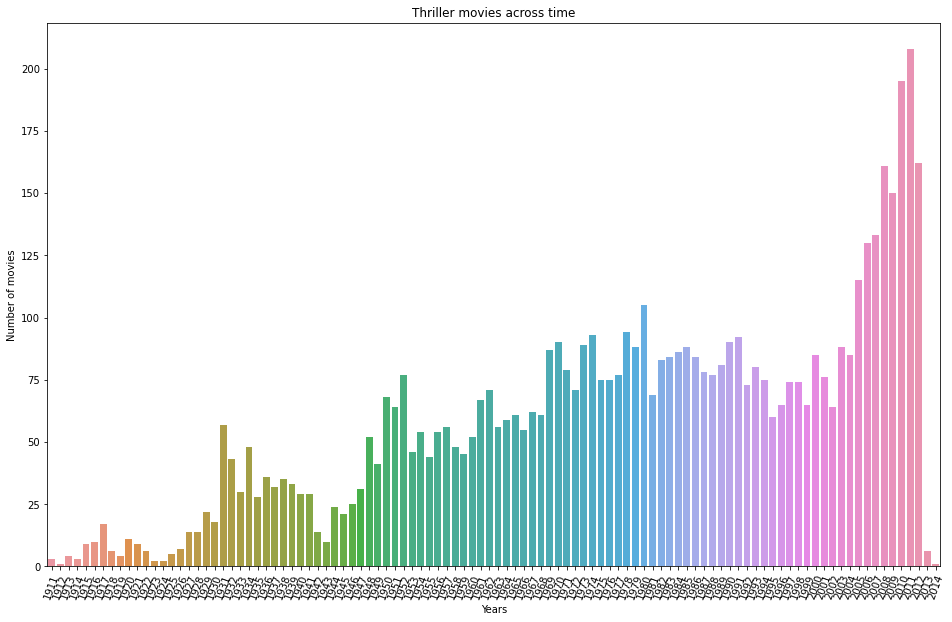

In [100]:
year_counts = df_datanan.loc[df_datanan['Movie genres (Freebase ID:name tuples)'] == '{"/m/07s9rl0": "Drama"}']['Movie release date'].value_counts()

plt.figure(figsize=(16,10))
ax = sns.barplot(year_counts.index,year_counts.values)
plt.title('Drama movies across time')
plt.ylabel('Number of movies')
plt.xlabel('Years')
plt.xticks(rotation=70)
plt.show()

In [98]:
df_datanan['Drama'] = df_datanan['Movie genres (Freebase ID:name tuples)'].apply(lambda x: is_x(x,'Drama'))

C:\Users\lisap\anaconda3\envs\IPLAB\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


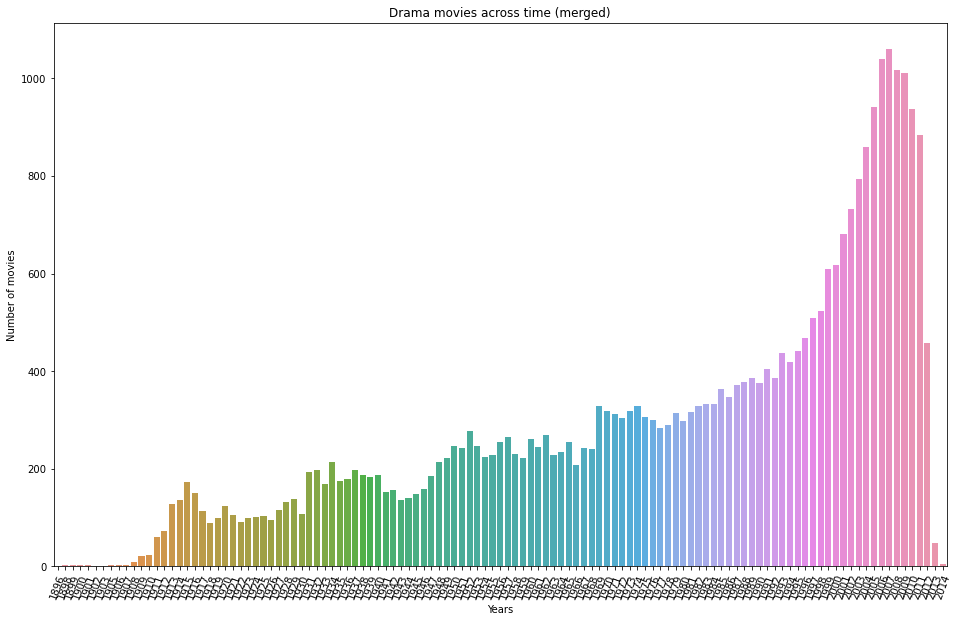

In [101]:
year_counts = df_datanan.loc[df_datanan['Drama']=='yes']['Movie release date'].value_counts()
year_counts
plt.figure(figsize=(16,10))
ax = sns.barplot(year_counts.index,year_counts.values)
plt.title('Drama movies across time (merged)')
plt.ylabel('Number of movies')
plt.xlabel('Years')
plt.xticks(rotation=70)
plt.show()